<a href="https://colab.research.google.com/github/eSeohyeon/Python_for_CV/blob/main/2_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna224.png -O like_lenna.png

--2025-03-19 10:23:05--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna224.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30283 (30K) [image/png]
Saving to: ‘like_lenna.png’

like_lenna.png      100%[===================>]  29.57K  --.-KB/s    in 0.003s  

2025-03-19 10:23:05 (8.28 MB/s) - ‘like_lenna.png’ saved [30283/30283]



이미지 읽기 성공!
변수 타입: <class 'numpy.ndarray'>
이미지 배열의 형태 : (224, 224)


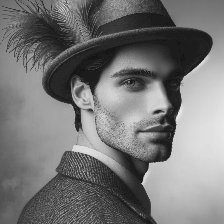

In [5]:
# 이미지 읽어오기

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("like_lenna.png", cv2.IMREAD_GRAYSCALE)
if img is not None:
  print("이미지 읽기 성공!")
else:
  print("이미지를 읽어오지 못했습니다.")

print(f"변수 타입: {type(img)}")
print(f"이미지 배열의 형태 : {img.shape}")

cv2_imshow(img)

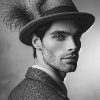

In [6]:
# 이미지 변환 #

# 사이즈 변환
img_small =cv2.resize(img, (100, 100))
cv2_imshow(img_small)

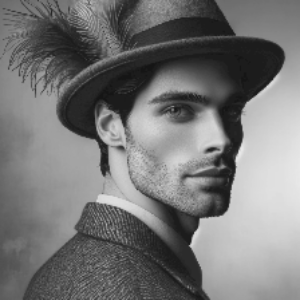

In [7]:
import numpy as np

# 이미지 사이즈 원래대로 되돌리기

new_height = 300
new_width = 300
dst = np.zeros((new_height, new_width), dtype=np.uint8) # 사이즈를 되돌린 이미지를 넣을 빈 배열 생성
dst = cv2.resize(img, (new_width, new_height))
cv2_imshow(dst)

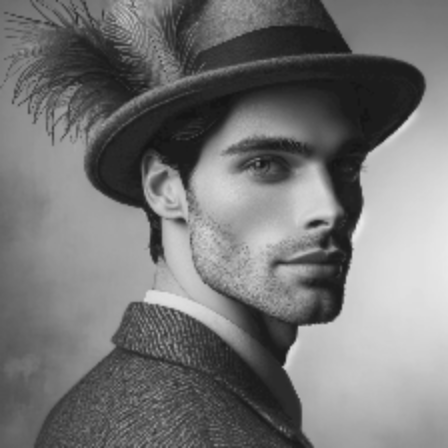

In [8]:
# 배율로 사이즈 변환
img_big = cv2.resize(img, dsize=None, fx=2, fy=2)
cv2_imshow(img_big)

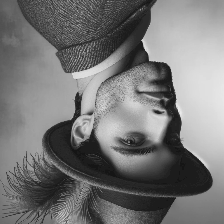

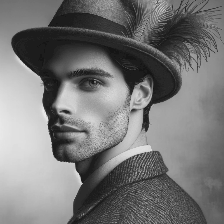

In [9]:
# 대칭 변환

img_flipped_h = cv2.flip(img, 0)
cv2_imshow(img_flipped_h)

img_flipped_v = cv2.flip(img, 1)
cv2_imshow(img_flipped_v)

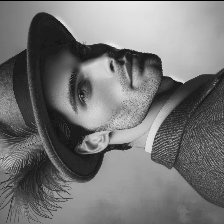

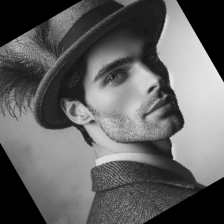

In [12]:
# 회전 변환

height, width = img.shape
matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1) # 회전을 위한 변환행렬 생성 (이미지 중심 기준, 90도, 배율)
rotate90 = cv2.warpAffine(img, matrix, (width, height)) # 변환행렬 적용
cv2_imshow(rotate90)

matrix2 = cv2.getRotationMatrix2D((width/2, height/2), 30, 1)
rotate30 = cv2.warpAffine(img, matrix2, (width, height))
cv2_imshow(rotate30)

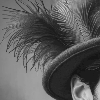

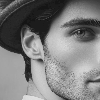

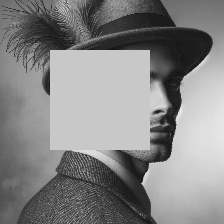

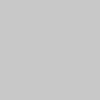

In [13]:
# 이미지 자르기

cv2_imshow(img[:100, :100])
cv2_imshow(img[50:150, 50:150])

cropped_img = img[50:150, 50:150]
cropped_img[:] = 200
cv2_imshow(img)
cv2_imshow(cropped_img)


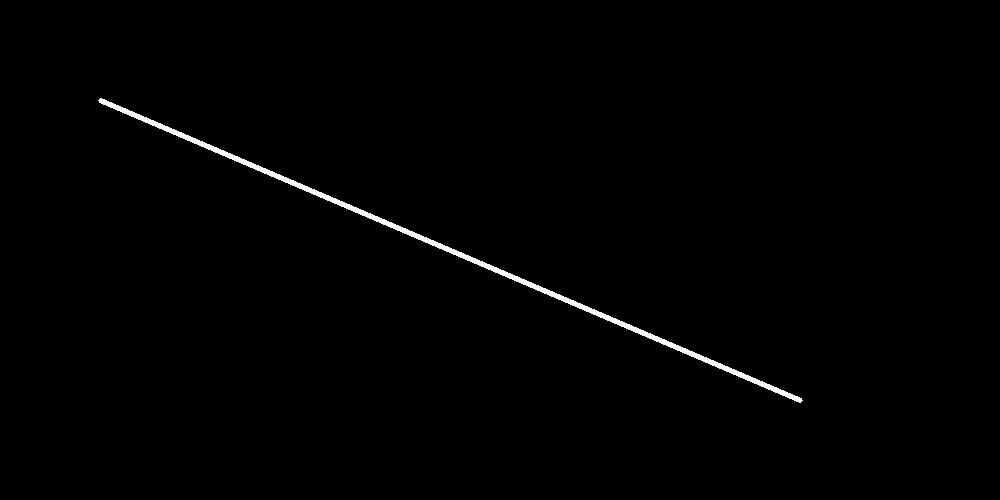

In [14]:
# 도형 그리기

space = np.zeros((500, 1000), dtype = np.uint8)
line_color = 255
space = cv2.line(space, (100, 100), (800, 400), line_color, 3, 1)

cv2_imshow(space)

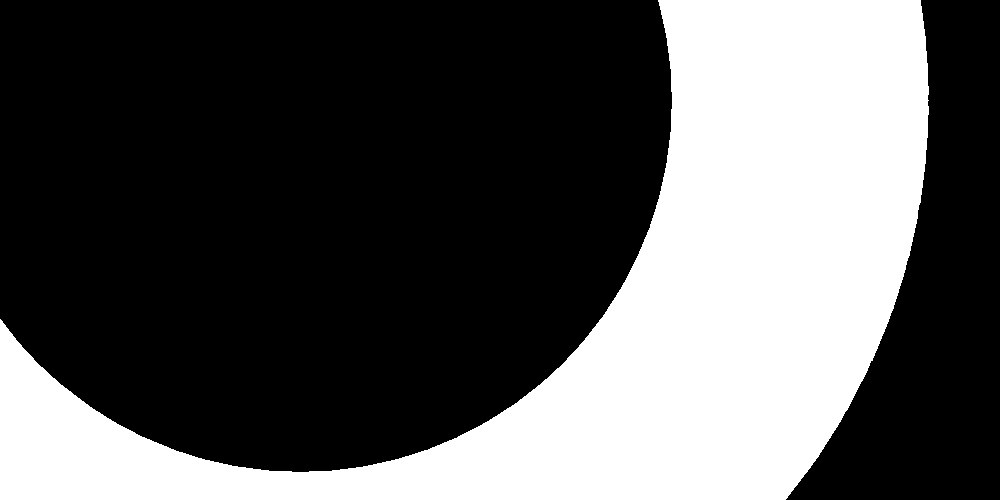

In [15]:
space = np.zeros((500, 1000), dtype = np.uint8)
color = 255
space = cv2.circle(space, (600, 200), 1000, color, color, 4, 1)
cv2_imshow(space)

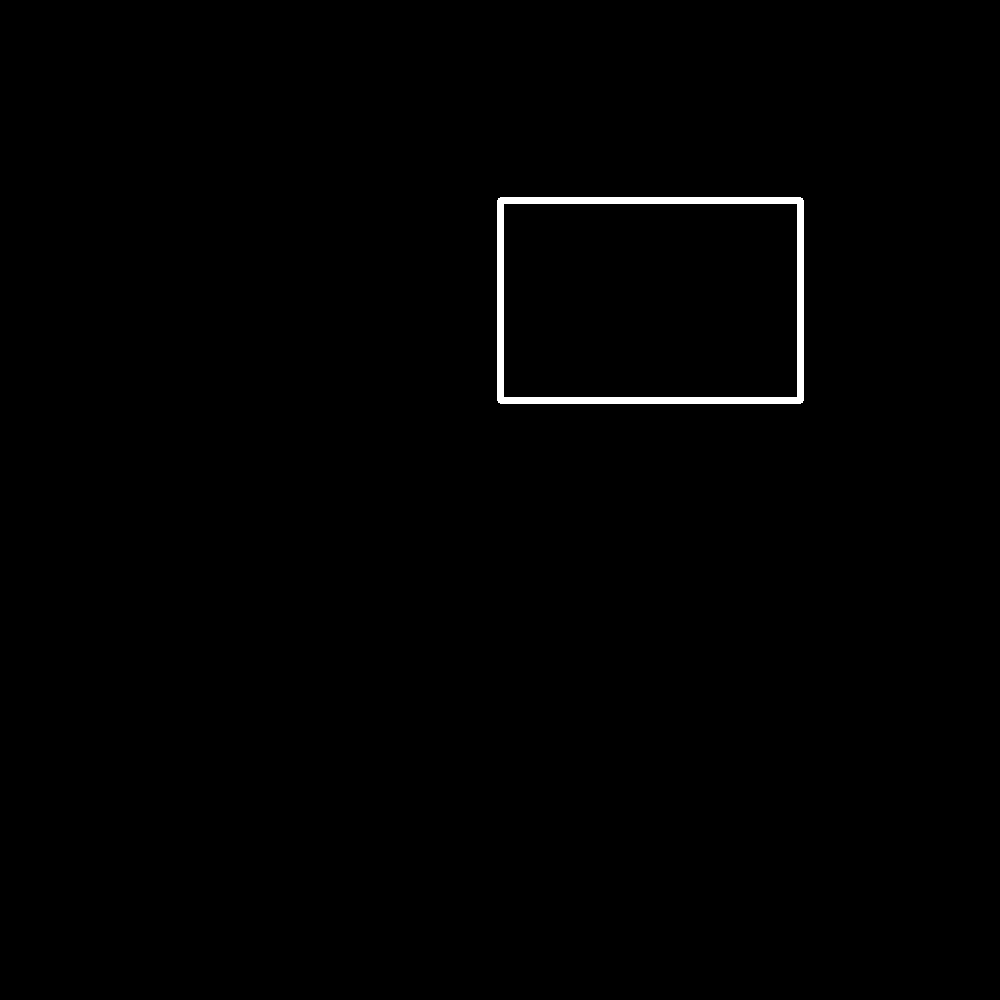

NameError: name 'space_ellips' is not defined

In [18]:
space_rec = np.zeros((1000, 1000), dtype = np.uint8)
space_rec = cv2.rectangle(space_rec, (500, 200), (800, 400), color, 5, 1)
cv2_imshow(space_rec)

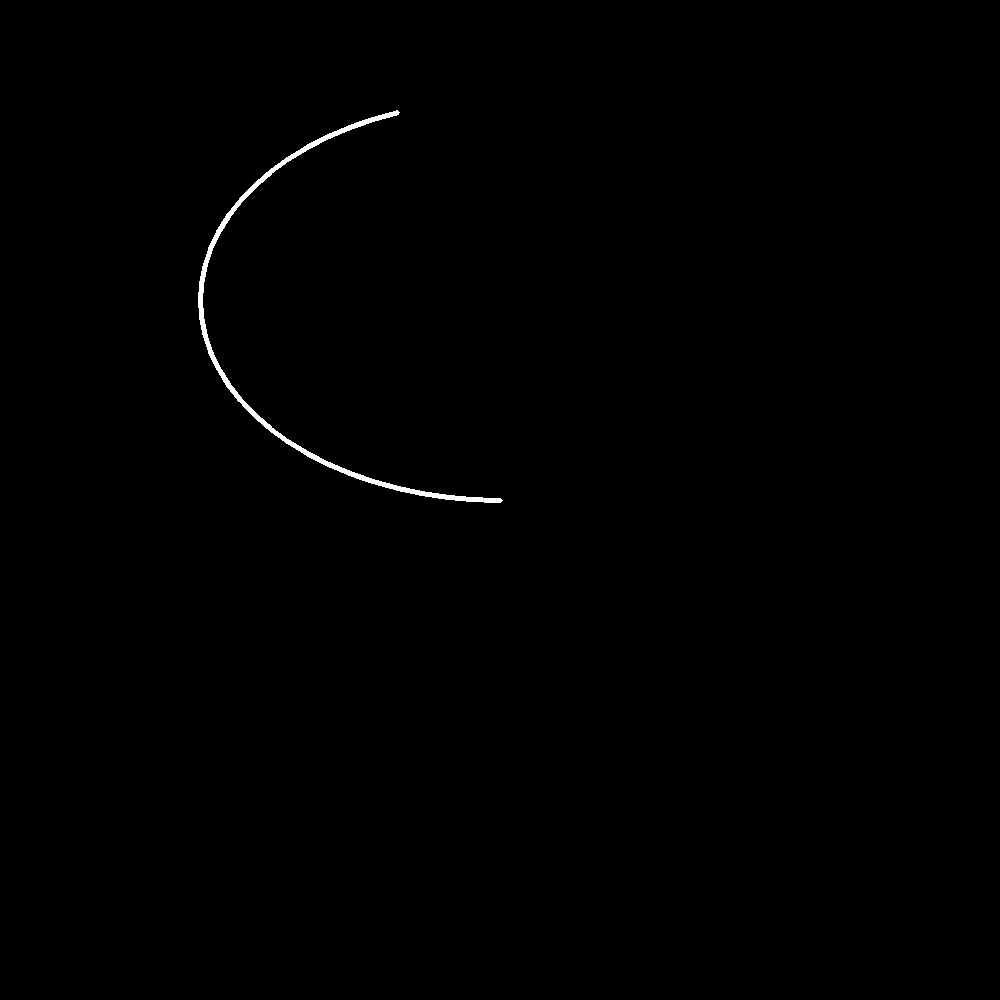

In [20]:
space_ellipse = np.zeros((1000, 1000), dtype = np.uint8)
space_ellipse = cv2.ellipse(space_ellipse, (500, 300), (300, 200), 0, 90, 250, color, 4)
cv2_imshow(space_ellipse)

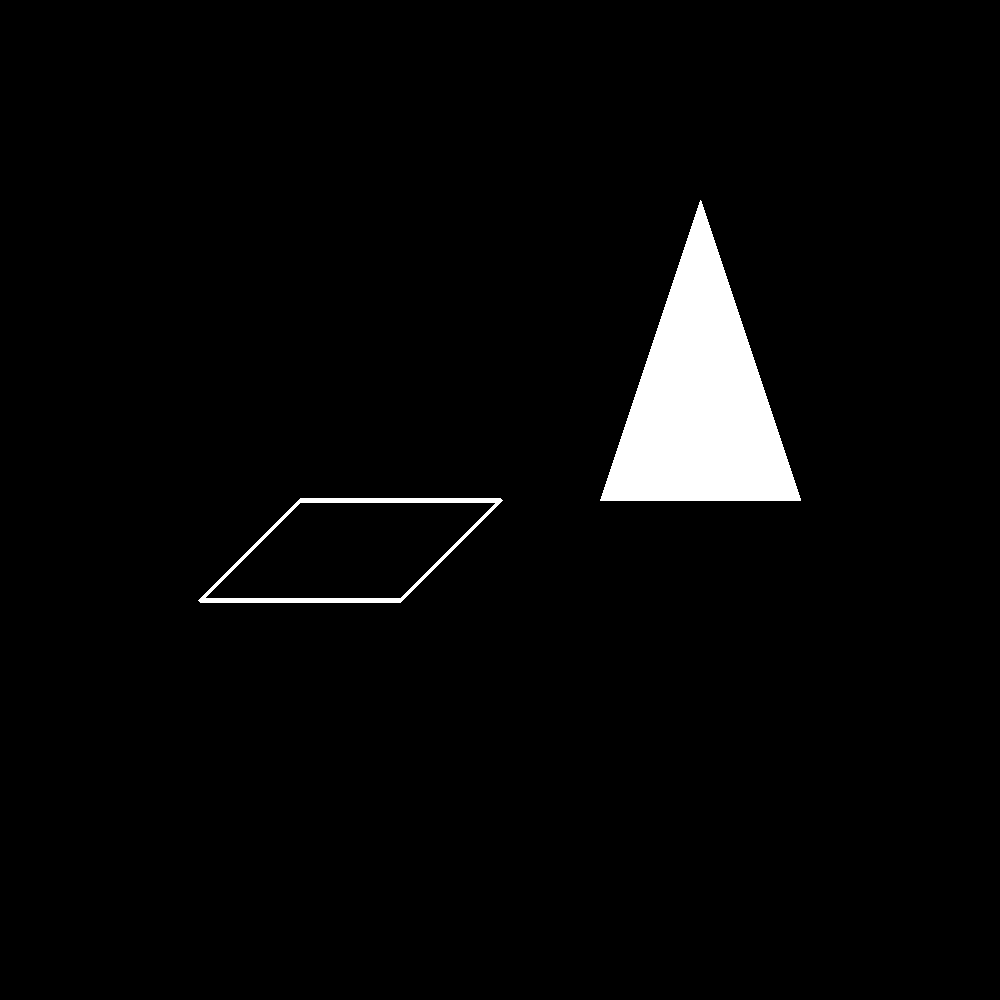

In [22]:
space_poly = np.zeros((1000, 1000), dtype = np.uint8)
obj1 = np.array([[300, 500], [500, 500], [400, 600], [200, 600]])
obj2 = np.array([[600, 500], [800, 500], [700, 200]])
space_poly = cv2.polylines(space_poly, [obj1], True, color, 3)
space_poly = cv2.fillPoly(space_poly, [obj2], color, 1)
cv2_imshow(space_poly)

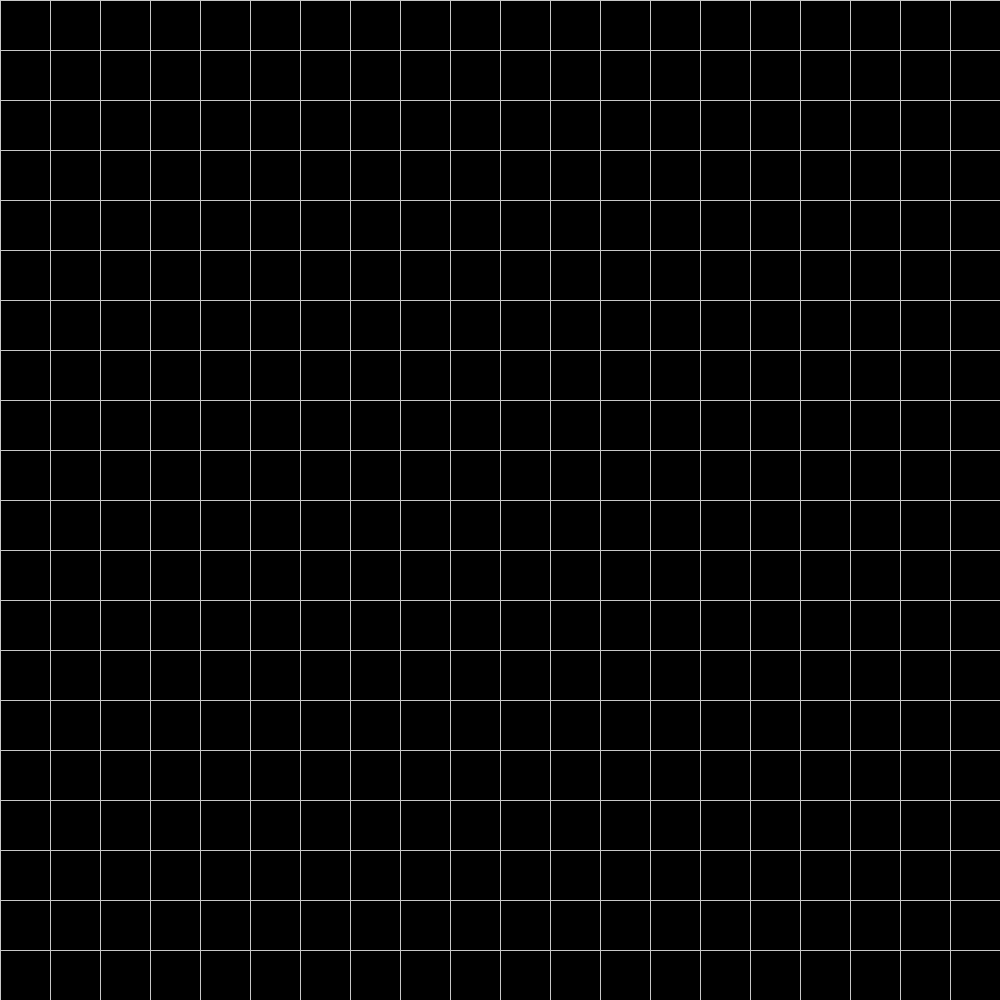

In [23]:
space = np.zeros((1000, 1000), dtype=np.uint8)

# 격자 간격 및 색상 설정
grid_spacing = 50
grid_color = 200

# 이미지에 격자 그리기
for x in range(0, space.shape[1], grid_spacing):
  cv2.line(space, (x, 0), (x, space.shape[0]), grid_color, 1)

for y in range(0, space.shape[0], grid_spacing):
  cv2.line(space, (0, y), (space.shape[1], y), grid_color, 1)

cv2_imshow(space)